### Computer Exercise 8 Part 1
### Name: Alexandyr Card
### G-Number: G01275535

In [2]:
%%capture
!pip install np_utils

In [5]:
### Load the Common Imports ###
from tensorflow import keras
import numpy as np
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
# from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt

### Load the Dataset ###

In [30]:
# load the MNIST data set, which already splits into training and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plot Sample Images

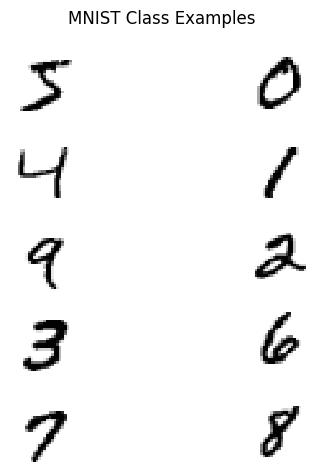

In [25]:
nums = set()

fig, ax = plt.subplots(nrows = 5, ncols=2)
row_num, col_num = 0, 0
for i in range(len(y_train)):
  if y_train[i] not in nums:
    nums.add(y_train[i])
    ax[row_num, col_num].imshow(x_train[i], cmap=matplotlib.cm.binary, interpolation="nearest")
    ax[row_num, col_num].axis("off")
    col_num += 1
    if col_num == 2:
      row_num +=1
      col_num = 0

  if row_num == 5:
    break

plt.suptitle("MNIST Class Examples")
plt.tight_layout()
plt.savefig("mnist_class_examples.jpg")
plt.show()


### Reshape and Scale the Data ###

In [31]:
# input image dimensions
img_x, img_y = 28, 28
#Reshape the data into a 4d tensor
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Convert class vectors to binary class matrices ###

This is the one to use with the `categorical_crossentropy` loss.

#### Question p. 2
When you type y_train[0] you get 5 prior to encoding

#### Questions p.3
1. [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
2. The variables have been encoded as vectors with the position of the element equal to the label. The reason the labels need to be encoded is because the loss function we use later, CategoricalCrossentropy, says in the documentation the labels must be one hot encoded. If we wanted to leave the labels as integers we could use the SparseCategoricalCrossentropy loss.

In [32]:
num_classes = 10 # Number of classes
print(y_train.shape)
print(y_train[0])
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)
print(y_train_categorical.shape)
print(y_train_categorical[0])

(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### A Simple Example ###

### Question p.4
This is a 3 layer model with 784 neurons in the input layer that expects a (28,28) input, 32 fully connected neurons in the single hidden dense layer, and 32 neurons in the output layer. It is a fully connected network, the output size is 32. There are 25,120 parameters in the first hidden layers (785 * 32) and 1,056 paramters in the output layer (33 * 32). Because no activation is specified the activation function is linear. Therefore, this model is no better than a linear classifier.

In [33]:
# Define the model
model = Sequential()
# Add layers
model.add(Flatten(input_shape=(28, 28)))  # Define input shape in the first layer
model.add(Dense(32))  # Dense layer with 32 units
model.add(Dense(32))  # Another Dense layer with 32 units

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,176 (102.25 KB)

 Trainable params: 26,176 (102.25 KB)

 Non-trainable params: 0 (0.00 B)

### A More Complicated Model ###

### Questions p.4
1. This is a 7 layer NN. The input size is (28,28), 6 hidden layers with relu activation 2 sets of convolution and max pooling followed by a flattening and dense layer and an output layer with 10 classes using the softmax activation function. The layers have the following number of neurons: 784, 576, 124, 64, 16, 1024, 1000, 10.
2. There are 1,087,106 parameters that need to be learned.
3. Add same padding to the first convolution layer to keep the output of that layer equal to 28,28 then run the max pooling over it.

In [46]:
num_classes=10
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,087,106 (4.15 MB)

 Trainable params: 1,087,106 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

### Question p.5
The mean squared error looks at the squared difference between the predicted label and the true label. The cross entropy loss looks at the sum of the true label * log(predicted label). For a softmax activation function you output a vector of probabilities. This means for the mean squared error you penalize each probability output even if the output is low whereas the multiplication within the cross entropy the only term the loss is concerned with is the true class label.

### Compile the Model ###

Here is a compilation of a simple model for recognition of images in the MNIST dataset.

In [49]:
# A Simple Model
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
#
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### Define the Learning Parameters ###

Put in your own numbers.  These are simply placeholders and not necessarily the right numbers to use.  

In [44]:
batch_size = 128  # Set the batch size
epochs = 10 # Set the number of epochs

### Train the Model ###

In [52]:
hist = model.fit(x_train, y_train_categorical,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_categorical),
          callbacks=None) #[history])

#
# Print what is in hist.history
#
print('history contains: ', hist.history)

score = model.evaluate(x_test, y_test_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9270 - loss: 0.2578 - val_accuracy: 0.9274 - val_loss: 0.2645
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9302 - loss: 0.2496 - val_accuracy: 0.9271 - val_loss: 0.2632
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.2475 - val_accuracy: 0.9271 - val_loss: 0.2639
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9295 - loss: 0.2522 - val_accuracy: 0.9259 - val_loss: 0.2653
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9303 - loss: 0.2544 - val_accuracy: 0.9279 - val_loss: 0.2633
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9323 - loss: 0.2471 - val_accuracy: 0.9272 - val_loss: 0.2637
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9319 - loss: 0.2461 - val_accuracy: 0.9278 - val_loss: 0.2646
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9328 - loss: 0.2474 - val_accuracy: 0.

### Plot Model Accuracy vs Epoch ###

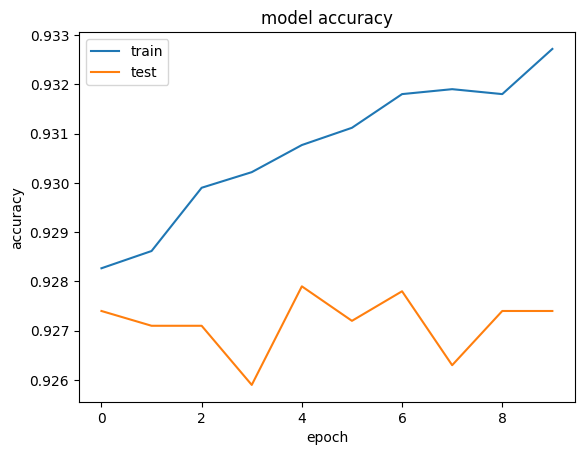

In [53]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Make Some Predictions ###

In [54]:
#predict first 4 images in the test set
print(y_test[:4])
model.predict(x_test[:4])

[7 2 1 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[1.1637032e-06, 3.7199094e-12, 3.7394909e-06, 5.4343008e-03,
        3.1004265e-07, 2.5376115e-05, 5.2911765e-11, 9.9417675e-01,
        1.2081360e-05, 3.4629001e-04],
       [2.3947908e-04, 1.9990744e-06, 9.9119484e-01, 1.3762899e-04,
        5.8819645e-15, 3.3558095e-03, 5.0279764e-03, 2.7046302e-18,
        4.2317359e-05, 9.1167359e-15],
       [1.1229737e-06, 9.7824019e-01, 1.3032602e-02, 2.7182966e-03,
        1.5014429e-04, 8.4473082e-04, 1.0222087e-03, 6.3916476e-04,
        3.1159541e-03, 2.3551777e-04],
       [9.9989796e-01, 5.7213791e-12, 2.8791346e-05, 1.7426390e-06,
        2.4627960e-08, 1.8946690e-05, 3.8601698e-05, 2.6558139e-06,
        3.3403021e-06, 7.9996971e-06]], dtype=float32)

# STOPPED HERE - p.7